<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_Viral_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

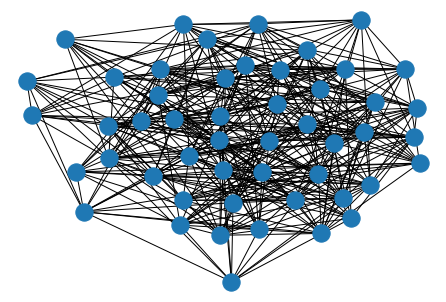

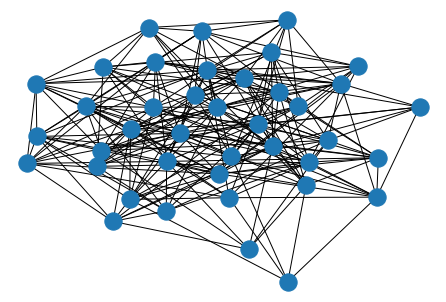

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 1 0]]
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:                       
                      PNN2 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      
                      PNN2 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9797, 9594, 9336, 9088, 8890, 8778, 8697, 8646, 8598, 8563, 8535, 8527, 8519, 8516, 8514, 8514, 8514, 8514, 8514]
[203, 406, 664, 912, 907, 816, 639, 442, 292, 215, 162, 119, 79, 47, 21, 13, 5, 2, 0]
[0, 0, 0, 0, 203, 406, 664, 912, 1110, 1222, 1303, 1354, 1402, 1437, 1465, 1473, 1481, 1484, 1486]
[[], [9797, 9594, 9336, 9088, 8890, 8778, 8697, 8646, 8598, 8563, 8535, 8527, 8519, 8516, 8514, 8514, 8514, 8514, 8514]]
[[], [203, 406, 664, 912, 907, 816, 639, 442, 292, 215, 162, 119, 79, 47, 21, 13, 5, 2, 0]]
[[], [0, 0, 0, 0, 203, 406, 664, 912, 1110, 1222, 1303, 1354, 1402, 1437, 1465, 1473, 1481, 1484, 1486]]


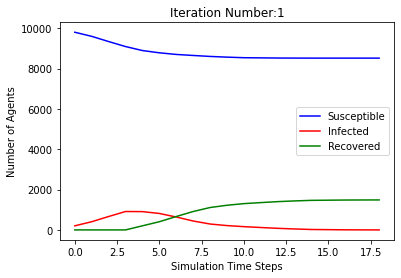

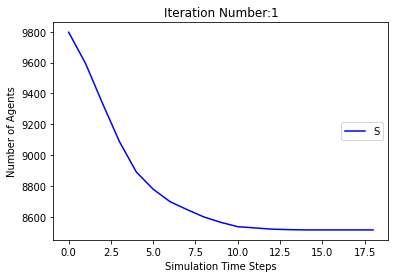

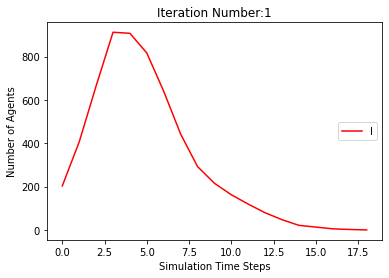

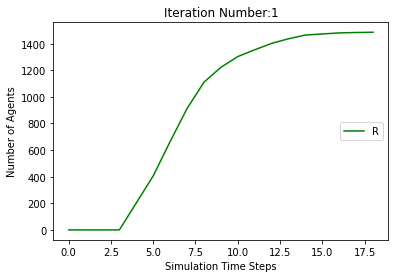

[9797, 9599, 9327, 9065, 8904, 8831, 8774, 8743, 8721, 8698, 8678, 8662, 8658, 8656, 8655, 8655, 8655, 8655, 8655]
[203, 401, 673, 935, 893, 768, 553, 322, 183, 133, 96, 81, 63, 42, 23, 7, 3, 1, 0]
[0, 0, 0, 0, 203, 401, 673, 935, 1096, 1169, 1226, 1257, 1279, 1302, 1322, 1338, 1342, 1344, 1345]
[[], [9797, 9594, 9336, 9088, 8890, 8778, 8697, 8646, 8598, 8563, 8535, 8527, 8519, 8516, 8514, 8514, 8514, 8514, 8514], [9797, 9599, 9327, 9065, 8904, 8831, 8774, 8743, 8721, 8698, 8678, 8662, 8658, 8656, 8655, 8655, 8655, 8655, 8655]]
[[], [203, 406, 664, 912, 907, 816, 639, 442, 292, 215, 162, 119, 79, 47, 21, 13, 5, 2, 0], [203, 401, 673, 935, 893, 768, 553, 322, 183, 133, 96, 81, 63, 42, 23, 7, 3, 1, 0]]
[[], [0, 0, 0, 0, 203, 406, 664, 912, 1110, 1222, 1303, 1354, 1402, 1437, 1465, 1473, 1481, 1484, 1486], [0, 0, 0, 0, 203, 401, 673, 935, 1096, 1169, 1226, 1257, 1279, 1302, 1322, 1338, 1342, 1344, 1345]]


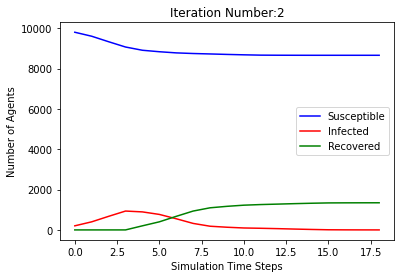

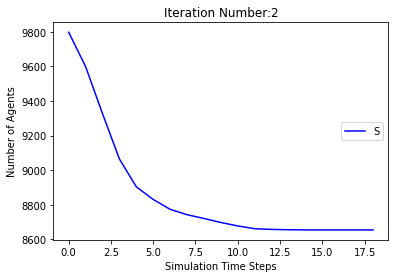

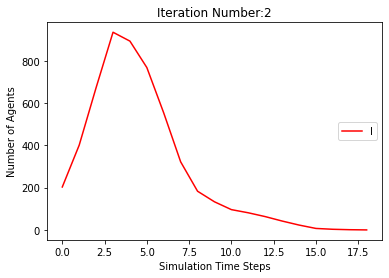

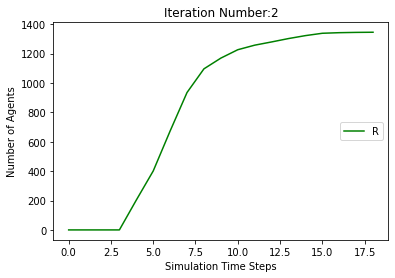

[9797, 9597, 9353, 9120, 8925, 8830, 8775, 8741, 8719, 8706, 8701, 8696, 8693, 8686, 8683, 8681, 8680, 8680, 8680, 8680, 8680]
[203, 403, 647, 880, 872, 767, 578, 379, 206, 124, 74, 45, 26, 20, 18, 15, 13, 6, 3, 1, 0]
[0, 0, 0, 0, 203, 403, 647, 880, 1075, 1170, 1225, 1259, 1281, 1294, 1299, 1304, 1307, 1314, 1317, 1319, 1320]
[[], [9797, 9594, 9336, 9088, 8890, 8778, 8697, 8646, 8598, 8563, 8535, 8527, 8519, 8516, 8514, 8514, 8514, 8514, 8514], [9797, 9599, 9327, 9065, 8904, 8831, 8774, 8743, 8721, 8698, 8678, 8662, 8658, 8656, 8655, 8655, 8655, 8655, 8655], [9797, 9597, 9353, 9120, 8925, 8830, 8775, 8741, 8719, 8706, 8701, 8696, 8693, 8686, 8683, 8681, 8680, 8680, 8680, 8680, 8680]]
[[], [203, 406, 664, 912, 907, 816, 639, 442, 292, 215, 162, 119, 79, 47, 21, 13, 5, 2, 0], [203, 401, 673, 935, 893, 768, 553, 322, 183, 133, 96, 81, 63, 42, 23, 7, 3, 1, 0], [203, 403, 647, 880, 872, 767, 578, 379, 206, 124, 74, 45, 26, 20, 18, 15, 13, 6, 3, 1, 0]]
[[], [0, 0, 0, 0, 203, 406, 664, 912, 

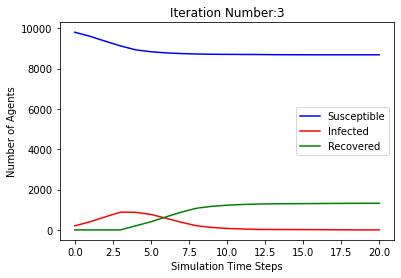

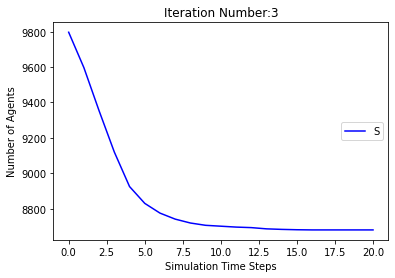

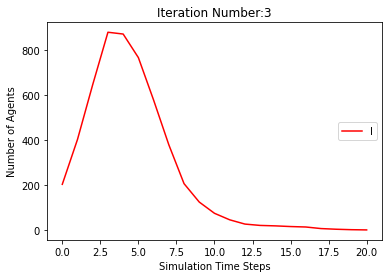

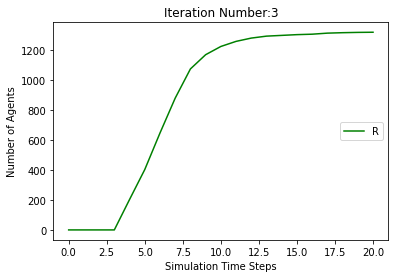

[9797, 9585, 9309, 9045, 8878, 8792, 8713, 8655, 8609, 8564, 8534, 8518, 8507, 8499, 8495, 8494, 8493, 8493, 8493, 8493, 8493]
[203, 415, 691, 955, 919, 793, 596, 390, 269, 228, 179, 137, 102, 65, 39, 24, 14, 6, 2, 1, 0]
[0, 0, 0, 0, 203, 415, 691, 955, 1122, 1208, 1287, 1345, 1391, 1436, 1466, 1482, 1493, 1501, 1505, 1506, 1507]
[[], [9797, 9594, 9336, 9088, 8890, 8778, 8697, 8646, 8598, 8563, 8535, 8527, 8519, 8516, 8514, 8514, 8514, 8514, 8514], [9797, 9599, 9327, 9065, 8904, 8831, 8774, 8743, 8721, 8698, 8678, 8662, 8658, 8656, 8655, 8655, 8655, 8655, 8655], [9797, 9597, 9353, 9120, 8925, 8830, 8775, 8741, 8719, 8706, 8701, 8696, 8693, 8686, 8683, 8681, 8680, 8680, 8680, 8680, 8680], [9797, 9585, 9309, 9045, 8878, 8792, 8713, 8655, 8609, 8564, 8534, 8518, 8507, 8499, 8495, 8494, 8493, 8493, 8493, 8493, 8493]]
[[], [203, 406, 664, 912, 907, 816, 639, 442, 292, 215, 162, 119, 79, 47, 21, 13, 5, 2, 0], [203, 401, 673, 935, 893, 768, 553, 322, 183, 133, 96, 81, 63, 42, 23, 7, 3, 1, 0],

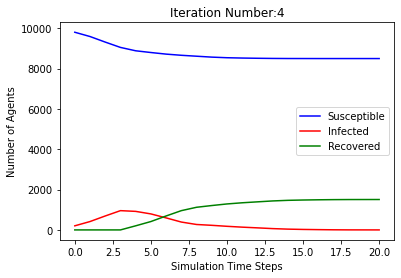

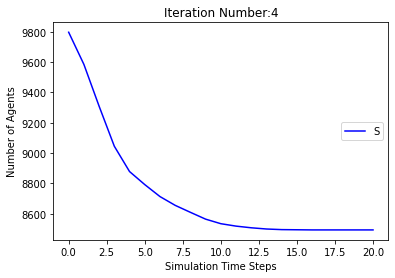

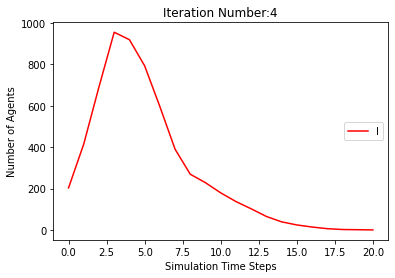

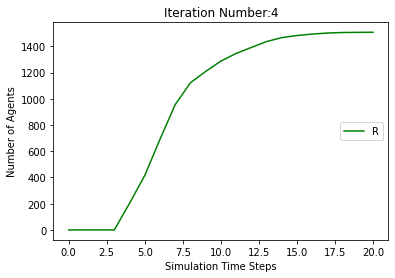

[9797, 9599, 9314, 9069, 8881, 8791, 8731, 8681, 8657, 8635, 8625, 8619, 8618, 8616, 8615, 8615, 8615, 8615, 8615]
[203, 401, 686, 931, 916, 808, 583, 388, 224, 156, 106, 62, 39, 19, 10, 4, 3, 1, 0]
[0, 0, 0, 0, 203, 401, 686, 931, 1119, 1209, 1269, 1319, 1343, 1365, 1375, 1381, 1382, 1384, 1385]
[[], [9797, 9594, 9336, 9088, 8890, 8778, 8697, 8646, 8598, 8563, 8535, 8527, 8519, 8516, 8514, 8514, 8514, 8514, 8514], [9797, 9599, 9327, 9065, 8904, 8831, 8774, 8743, 8721, 8698, 8678, 8662, 8658, 8656, 8655, 8655, 8655, 8655, 8655], [9797, 9597, 9353, 9120, 8925, 8830, 8775, 8741, 8719, 8706, 8701, 8696, 8693, 8686, 8683, 8681, 8680, 8680, 8680, 8680, 8680], [9797, 9585, 9309, 9045, 8878, 8792, 8713, 8655, 8609, 8564, 8534, 8518, 8507, 8499, 8495, 8494, 8493, 8493, 8493, 8493, 8493], [9797, 9599, 9314, 9069, 8881, 8791, 8731, 8681, 8657, 8635, 8625, 8619, 8618, 8616, 8615, 8615, 8615, 8615, 8615]]
[[], [203, 406, 664, 912, 907, 816, 639, 442, 292, 215, 162, 119, 79, 47, 21, 13, 5, 2, 0], [

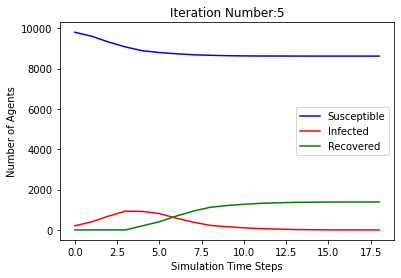

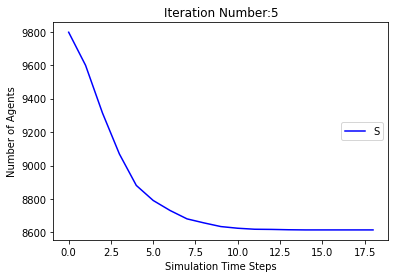

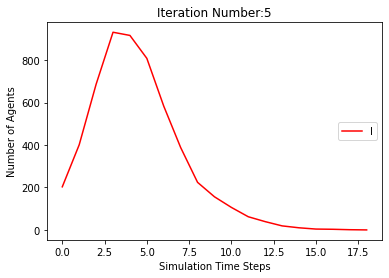

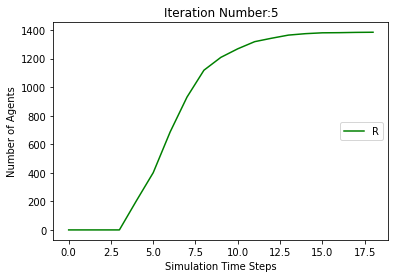

In [ ]:
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

In [ ]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
